In [1]:
from micrograd.nn import *

x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=0.9412760629811456)

In [2]:
x = [2.0, 3.0]
n = Layer(2, 3)
n(x)

[Value(data=0.9975418993892692),
 Value(data=0.9985701499809548),
 Value(data=0.9832644957153657)]

In [3]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)
len(n.parameters())
# draw_dot(n(x))

41

In [4]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]
ypred

[Value(data=0.41050079169671866),
 Value(data=0.24782646506397538),
 Value(data=0.1019749693407429),
 Value(data=0.008049446605373297)]

In [5]:
loss = sum([(ygout - ygt) ** 2 for ygout, ygt in zip(ys, ypred)])
loss

Value(data=4.102894936937689)

In [6]:
loss.backward()

In [7]:
n.layers[0].neurons[0].w[0].data

-0.7918087571251775

In [8]:
n.layers[0].neurons[0].w[0].grad

0.05081719542540911

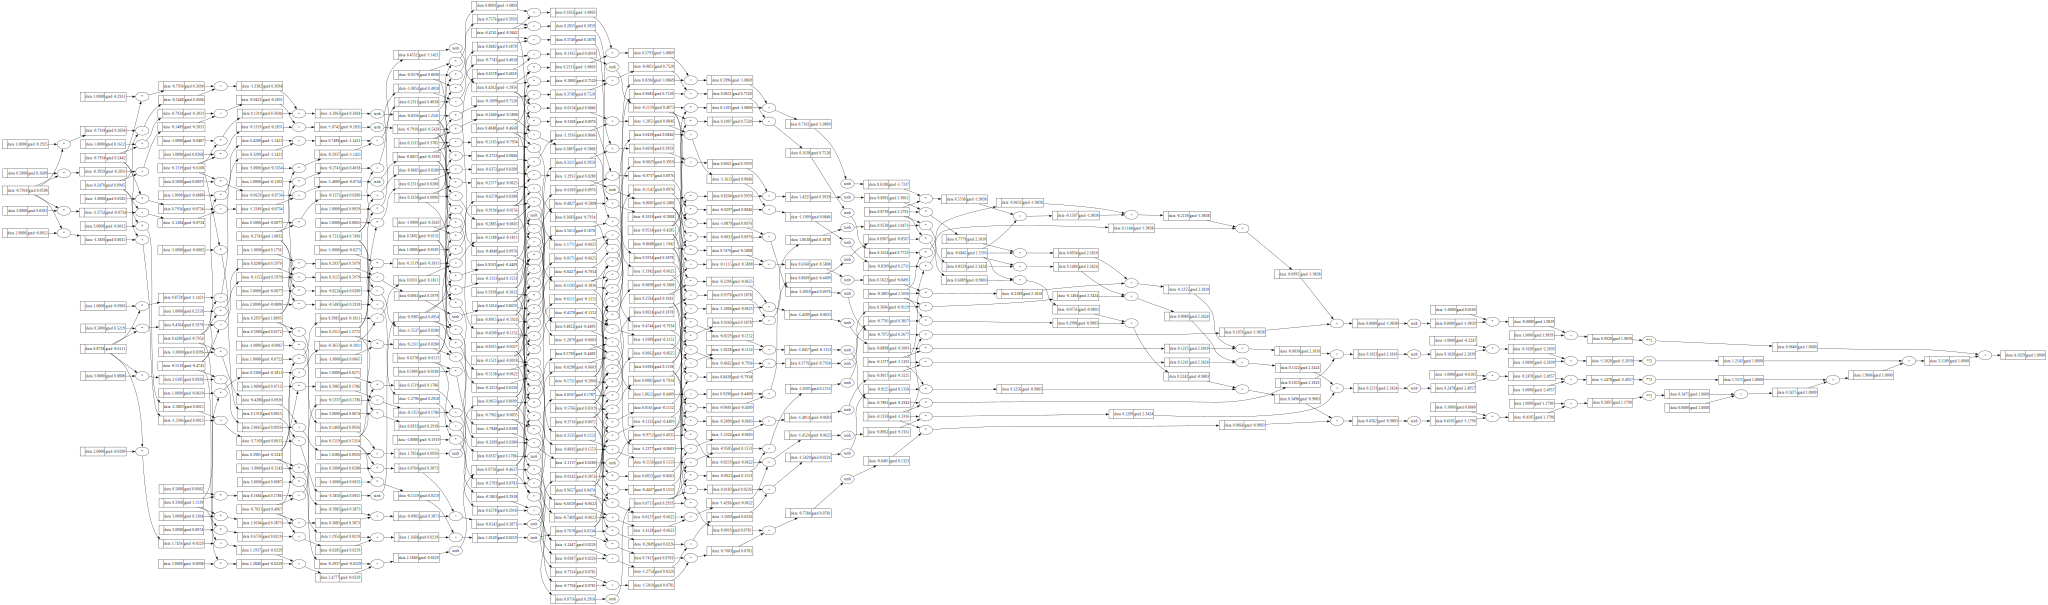

In [9]:
draw_dot(loss)

In [10]:
lr = 0.01
for p in n.parameters():
    p.data += lr * -p.grad


In [11]:
n.layers[0].neurons[0].w[0].data

-0.7923169290794316

In [12]:
for k in range(100):
	ypred = [n(x) for x in xs]
	loss = sum([(ygout - ygt) ** 2 for ygout, ygt in zip(ys, ypred)])

	for p in n.parameters():
		p.grad = 0.0
	loss.backward()

	lr = 0.05
	for p in n.parameters():
		p.data += lr * -p.grad


	print(k, loss.data)

0 3.7890644650275007
1 2.9760683661356104
2 2.3377269675612733
3 1.6766246725732565
4 1.1588850761264888
5 0.801105331776564
6 0.5779406394215975
7 0.44285268095010993
8 0.3551680621296789
9 0.2939814998891429
10 0.24937585147705252
11 0.21569131347666687
12 0.1895008790510997
13 0.1686372177141434
14 0.15167533555724627
15 0.13764588738642114
16 0.12586964115613344
17 0.1158581825187481
18 0.10725226313572225
19 0.09978232000623705
20 0.09324248421386114
21 0.08747304159717215
22 0.08234833126085174
23 0.0777682274545109
24 0.07365203449152548
25 0.0699340388782711
26 0.06656022013170462
27 0.06348578508673927
28 0.06067329630127028
29 0.05809123501036953
30 0.05571288598990061
31 0.05351546370226576
32 0.051479421269199105
33 0.04958789938556549
34 0.04782628336103016
35 0.04618184444600719
36 0.04464344739840563
37 0.04320131051312467
38 0.0418468075038633
39 0.04057230300084991
40 0.03937101522282185
41 0.03823690074945389
42 0.037164557371031345
43 0.036149141804962655
44 0.035186

In [13]:
ypred

[Value(data=0.9507021350853323),
 Value(data=-0.9404598258792415),
 Value(data=-0.9434508580022078),
 Value(data=0.9300947436685703)]